In [1]:
conda install -c conda-forge imbalanced-learn=0.8.1 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.5.2
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0




## IMPORTING IMPORTANT LIBRARIES

In [3]:
## importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

# Loading the dataset
data = pd.read_csv("C:\\Users\\priya\\Desktop\\DataScience\\CreditCard\\creditcard.csv")

## EDA

In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Data Cleaning

In [5]:
# Data Cleaning
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Dealing with imbalanced data

In [6]:
X = data.drop('Class', axis=1)
y = data['Class']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [7]:
from sklearn.utils import resample

In [8]:
majority_class = data[data['Class'] == 0]
minority_class = data[data['Class'] == 1]

In [9]:
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

In [10]:
data_upsampled = pd.concat([majority_class, minority_upsampled])

In [11]:
data_upsampled = data_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [12]:
X_resampled = data_upsampled.drop('Class', axis=1)
y_resampled = data_upsampled['Class']

## Feature Engineering

In [15]:
data['hour_of_day'] = (data['Time'] // 3600) % 24
data['day_of_week'] = (data['Time'] // 86400) % 7

In [13]:
data['amount_category'] = pd.cut(data['Amount'], bins=[0, 100, 500, 1000, np.inf], labels=['small', 'medium', 'large', 'extra-large'])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Model Selection

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## Model Training

In [17]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'amount_category', 'hour_of_day', 'day_of_week'],
      dtype='object')


In [18]:
print(data.dtypes)

Time                float64
V1                  float64
V2                  float64
V3                  float64
V4                  float64
V5                  float64
V6                  float64
V7                  float64
V8                  float64
V9                  float64
V10                 float64
V11                 float64
V12                 float64
V13                 float64
V14                 float64
V15                 float64
V16                 float64
V17                 float64
V18                 float64
V19                 float64
V20                 float64
V21                 float64
V22                 float64
V23                 float64
V24                 float64
V25                 float64
V26                 float64
V27                 float64
V28                 float64
Amount              float64
Class                 int64
amount_category    category
hour_of_day         float64
day_of_week         float64
dtype: object


In [19]:
data['amount_bin'] = pd.to_numeric(data['amount_bin'], errors='coerce')
data['amount_category'] = pd.to_numeric(data['amount_category'], errors='coerce')

KeyError: 'amount_bin'

In [20]:
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
X_train = X_train.drop(columns=datetime_columns)
X_test = X_test.drop(columns=datetime_columns)

In [21]:
model = RandomForestClassifier(random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Training the model
model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [23]:
print(X_test.dtypes)

print(X_test.isnull().sum())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64


In [24]:
proba = model.predict_proba(X_test)

proba_array = np.array(proba)

y_pred = np.argmax(proba_array, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9999736208079067
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57219
           1       1.00      1.00      1.00     56507

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[57216     3]
 [    0 56507]]


In [26]:
from imblearn.over_sampling import SMOTE

# Use SMOTE 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the model
model = RandomForestClassifier(random_state=42)

# Training the model on the resampled data
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [29]:
y_prob = model.predict_proba(X_test)[:, 1]

In [30]:
y_pred_adjusted = (y_prob > 0.3).astype(int)

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

In [32]:
print(f"Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Precision: 0.9999292173205216, Recall: 1.0, F1-Score: 0.9999646074076696


## FEATURE IMPORTANCES

In [33]:
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

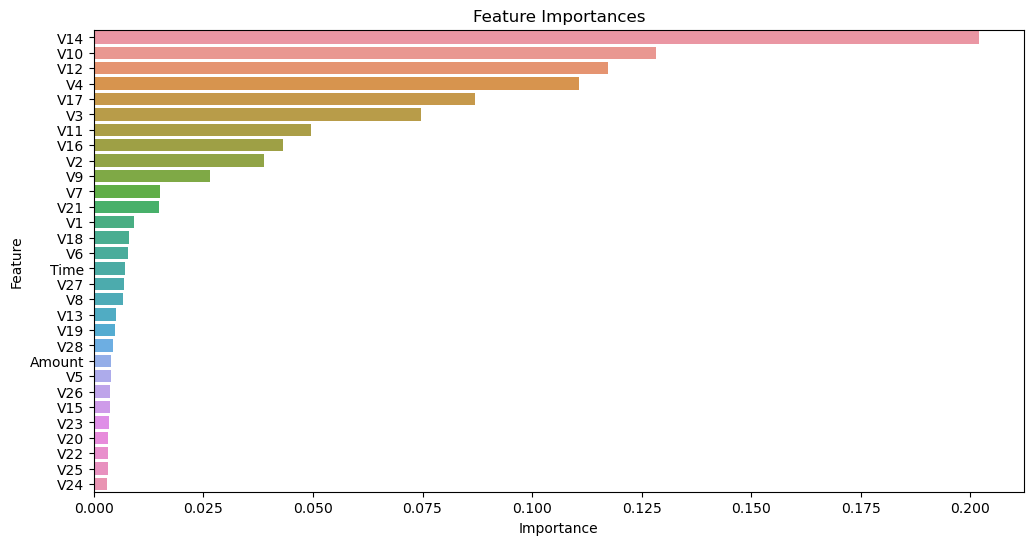

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [36]:
!pip install Flask

In [37]:
import os

current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

Current Working Directory: C:\Users\priya\Desktop\DataScience\CreditCard


In [38]:
file_list = os.listdir(current_directory)
print(f"Files in Current Directory: {file_list}")

Files in Current Directory: ['.git', '.ipynb_checkpoints', 'app.py', 'app.py.ipynb', 'Capstone Documentation.docx', 'Capstone Project - Predicting Credit Card Fraud.docx', 'CreditCard', 'creditcard.csv', 'CreditCardFraudPrediction-Data visualization &Interpretation.ipynb', 'CreditCardFraudPrediction.ipynb', 'Final CREDITCARDFRAUD.ipynb', 'Final Project Report.docx', 'Predicting Credit Card Fraud.docx', 'Procfile.txt', 'random_forest_model.joblib', 'requirements.txt', 'Templates', 'trained_model.joblib', 'venv', '__pycache__', '~$edicting Credit Card Fraud.docx', '~$pstone Project - Predicting Credit Card Fraud.docx', '~WRL1219.tmp', '~WRL3666.tmp']


In [39]:
model = joblib.load('random_forest_model.joblib')

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  


In [40]:
import os
current_directory = os.getcwd()

In [41]:
files_in_directory = os.listdir(current_directory)
print("Files in Current Directory:", files_in_directory)

Files in Current Directory: ['.git', '.ipynb_checkpoints', 'app.py', 'app.py.ipynb', 'Capstone Documentation.docx', 'Capstone Project - Predicting Credit Card Fraud.docx', 'CreditCard', 'creditcard.csv', 'CreditCardFraudPrediction-Data visualization &Interpretation.ipynb', 'CreditCardFraudPrediction.ipynb', 'Final CREDITCARDFRAUD.ipynb', 'Final Project Report.docx', 'Predicting Credit Card Fraud.docx', 'Procfile.txt', 'random_forest_model.joblib', 'requirements.txt', 'Templates', 'trained_model.joblib', 'venv', '__pycache__', '~$edicting Credit Card Fraud.docx', '~$pstone Project - Predicting Credit Card Fraud.docx', '~WRL1219.tmp', '~WRL3666.tmp']


In [42]:
current_directory = os.getcwd()
files_in_directory = os.listdir(current_directory)
files_in_directory

['.git',
 '.ipynb_checkpoints',
 'app.py',
 'app.py.ipynb',
 'Capstone Documentation.docx',
 'Capstone Project - Predicting Credit Card Fraud.docx',
 'CreditCard',
 'creditcard.csv',
 'CreditCardFraudPrediction-Data visualization &Interpretation.ipynb',
 'CreditCardFraudPrediction.ipynb',
 'Final CREDITCARDFRAUD.ipynb',
 'Final Project Report.docx',
 'Predicting Credit Card Fraud.docx',
 'Procfile.txt',
 'random_forest_model.joblib',
 'requirements.txt',
 'Templates',
 'trained_model.joblib',
 'venv',
 '__pycache__',
 '~$edicting Credit Card Fraud.docx',
 '~$pstone Project - Predicting Credit Card Fraud.docx',
 '~WRL1219.tmp',
 '~WRL3666.tmp']

In [43]:
import joblib

In [44]:
model_path = 'random_forest_model.joblib'
joblib.dump(model, model_path)

['random_forest_model.joblib']

In [45]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

In [46]:
app = Flask(__name__)

In [47]:
model_path = 'random_forest_model.joblib'
model = joblib.load(model_path)

In [48]:
@app.route('/predict', methods=['POST'])
def predict():
    try:
        
        data = request.get_json(force=True)
        features = data['features']
        features = np.array(features).reshape(1, -1)
            
        prediction = model.predict(features)
               
        response = {'prediction': int(prediction[0])}
        return jsonify(response)
    except Exception as e:
        return jsonify({'error': str(e)})
if __name__ == '__main__':
    app.run(port=5000, debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\priya\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [49]:
!pip install Flask
!pip install joblib

In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [52]:
joblib.dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [53]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [54]:
conda activate myenv


Note: you may need to restart the kernel to use updated packages.


In [55]:
conda install scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\priya\anaconda3

  added / updated specs:
    - scikit-learn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2023.11.~ --> pkgs/main::ca-certificates-2023.12.12-haa95532_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2023.11.1~ --> pkgs/main/win-64::certifi-2023.11.17-py311haa95532_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
os._exit(00)

In [ ]:
joblib.dump(model, 'trained_model.joblib')

In [ ]:
data = {
    "features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
}

In [ ]:
import requests

url = "http://127.0.0.1:5000/predict"

data = {
    "V1":1,
    "V2":2,
    "V3":3,
    "V4":4,
    "V5":5,
    "V6":6,
    "V7":7,
    "V8":8,
    "V9":9,
    "V10":10,
    "V11":11,
    "V12":12,
    "V13":13,
    "V14":14,
    "V15":15,
    "V16":16,
    "V17":17,
    "V18":18,
    "V19":19,
    "V20":20,
    "V21":21,
    "V22":22,
    "V23":23,
    "V24":24,
    "V25":25,
    "V26":26,
    "V27":27,
    "V28":28,
    "V29":29,
    "V30":30
}

response = requests.post(url, json=data)

print(response.json())

In [ ]:
import sklearn
print(sklearn.__version__)

### DEPLOYING MOdel (Tried Sagemaker, heroku and Github)

In [ ]:
git init
git add .
git commit -m "Initial commit"

In [ ]:
!git --version

In [ ]:
!C:\Program Files\Git\bin\git.exe --version

In [ ]:
!C:\\Program Files\\Git\\bin\\git.exe --version

In [ ]:
import os
git_bin_path = r'C:\Program Files\Git\bin'

os.environ['PATH'] = f"{git_bin_path};{os.environ['PATH']}"

!git --version

In [ ]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

model = joblib.load("trained_model.joblib")

@app.route('/predict', methods=['POST'])
def predict():
 
    data = request.get_json()

    features = [data["V1"], data["V2"], ..., data["V30"]]
    
    prediction = model.predict([features])

    return jsonify({"prediction": prediction[0]})

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=True)

In [ ]:
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000, debug=False)

In [ ]:
@app.route('/')
def home():
    return 'Hello, this is the home page!'

In [ ]:
!git push heroku master

In [ ]:
git push heroku master

### they all need to be paid... cannot deploy otherwise